In [1]:
import pandas as pd
from pathlib import Path
import hvplot.pandas
from config import geoapify_key 
import matplotlib.pyplot as plt
import json
import requests
from scipy.stats import linregress

hospitalsheet = Path("Resources/Hospital_General_Information.csv")

hospitals = pd.read_csv(hospitalsheet)
hospitals.head()

Facility ID                    Facility Name                     Address  \
0      010001  SOUTHEAST HEALTH MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1      010005         MARSHALL MEDICAL CENTERS  2505 U S HIGHWAY 431 NORTH   
2      010006     NORTH ALABAMA MEDICAL CENTER         1701 VETERANS DRIVE   
3      010007         MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   
4      010008      CRENSHAW COMMUNITY HOSPITAL         101 HOSPITAL CIRCLE   

       City State  ZIP Code County Name    Phone Number         Hospital Type  \
0    DOTHAN    AL     36301     HOUSTON  (334) 793-8701  Acute Care Hospitals   
1      BOAZ    AL     35957    MARSHALL  (256) 593-8310  Acute Care Hospitals   
2  FLORENCE    AL     35630  LAUDERDALE  (256) 629-1000  Acute Care Hospitals   
3       OPP    AL     36467   COVINGTON  (334) 493-3541  Acute Care Hospitals   
4   LUVERNE    AL     36049    CRENSHAW  (334) 335-3374  Acute Care Hospitals   

                            Hospital Ownership  ...  \
0  Government - Hospital District or Authority  ...   
1  Government - Hospital District or Authority  ...   
2                                  Proprietary  ...   
3               Voluntary non-profit - Private  ...   
4                                  Proprietary  ...   

  Count of READM Measures Better Count of READM Measures No Different  \
0                              0                                   10   
1                              0                                   10   
2                              0                                    8   
3                              0                                    6   
4                              0                                    4   

  Count of READM Measures Worse READM Group Footnote  \
0                             1                  NaN   
1                             0                  NaN   
2                             1                  NaN   
3                             0                  NaN   
4                             0                  NaN   

  Pt Exp Group Measure Count Count of Facility Pt Exp Measures  \
0                          8                                 8   
1                          8                                 8   
2                          8                                 8   
3                          8                                 8   
4                          8                     Not Available   

  Pt Exp Group Footnote TE Group Measure Count Count of Facility TE Measures  \
0                   NaN                     12                             9   
1                   NaN                     12                            11   
2                   NaN                     12                             9   
3                   NaN                     12                             5   
4                     5                     12                             5   

  TE Group Footnote  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 38 columns]

In [2]:
hospitalsclean = hospitals.dropna(subset=['Hospital overall rating'])
hospitalsoverall = hospitalsclean[hospitalsclean['Hospital overall rating'].str.contains("Not Available")== False]
hospitalsoverall['Hospital overall rating'] = pd.to_numeric(hospitalsoverall['Hospital overall rating'], errors='coerce')

C:\Users\canno\AppData\Local\Temp\ipykernel_20704\2169129005.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalsoverall['Hospital overall rating'] = pd.to_numeric(hospitalsoverall['Hospital overall rating'], errors='coerce')


In [3]:
hospitalstateaverage = hospitalsoverall.groupby('State')['Hospital overall rating'].mean().reset_index()

In [4]:
hospitalstateaverage_df = pd.DataFrame(hospitalstateaverage)
hospitalstateaverage_df.head()

State  Hospital overall rating
0    AK                 2.857143
1    AL                 3.015385
2    AR                 2.916667
3    AZ                 3.000000
4    CA                 3.007663

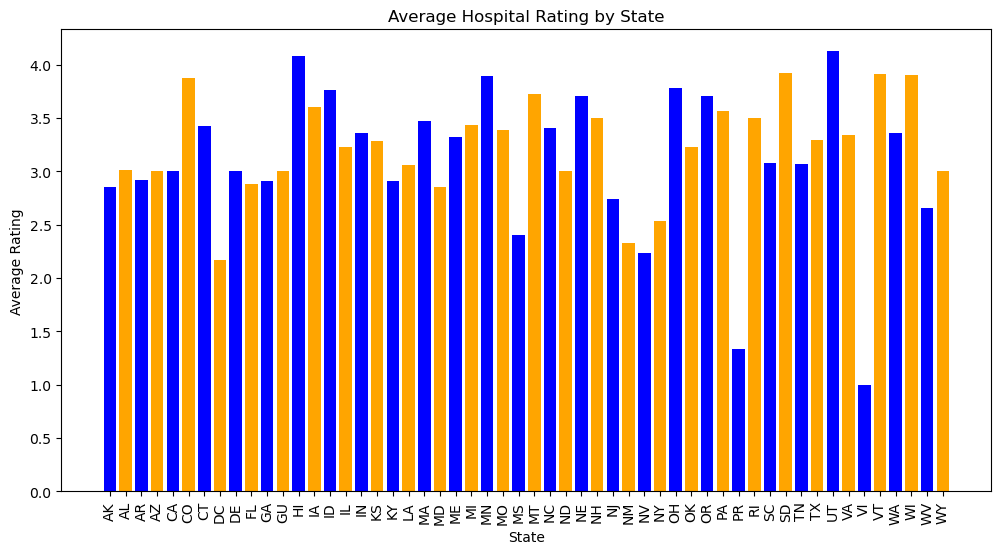

In [107]:
plt.figure(figsize=(12, 6))
plt.bar(hospitalstateaverage['State'], hospitalstateaverage['Hospital overall rating'], color = ['blue','orange'])
plt.xlabel('State')
plt.ylabel('Average Rating')
plt.title('Average Hospital Rating by State')
plt.xticks(rotation=90)
plt.savefig("output_data/AvgbyState.png")
plt.show()

In [26]:
hospitaltypes = hospitalsoverall['Hospital Type'].value_counts()
hospitaltypes

Acute Care Hospitals         2749
Critical Access Hospitals     339
Name: Hospital Type, dtype: int64

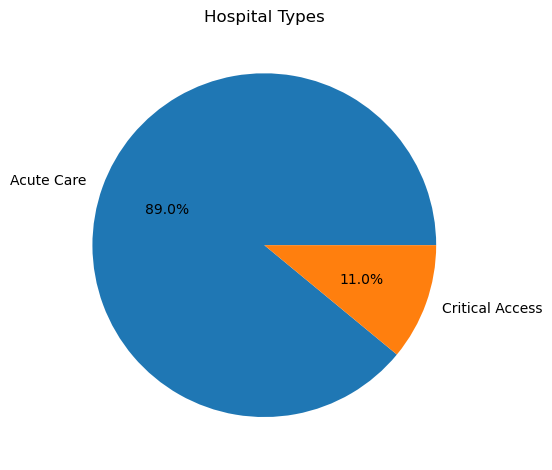

In [108]:
plt.pie(hospitalsoverall['Hospital Type'].value_counts(), labels = ('Acute Care', 'Critical Access'), autopct="%1.1f%%")
plt.title("Hospital Types")
plt.savefig("output_data/HospitalTypes.png")
plt.tight_layout()
plt.show()

In [6]:
hospitaltypeaverage = hospitalsoverall.groupby('Hospital Type')['Hospital overall rating'].mean().reset_index()
hospitaltypeaverage_df = pd.DataFrame(hospitaltypeaverage)
hospitaltypeaverage_df.head()

Hospital Type  Hospital overall rating
0       Acute Care Hospitals                 3.197163
1  Critical Access Hospitals                 3.401180

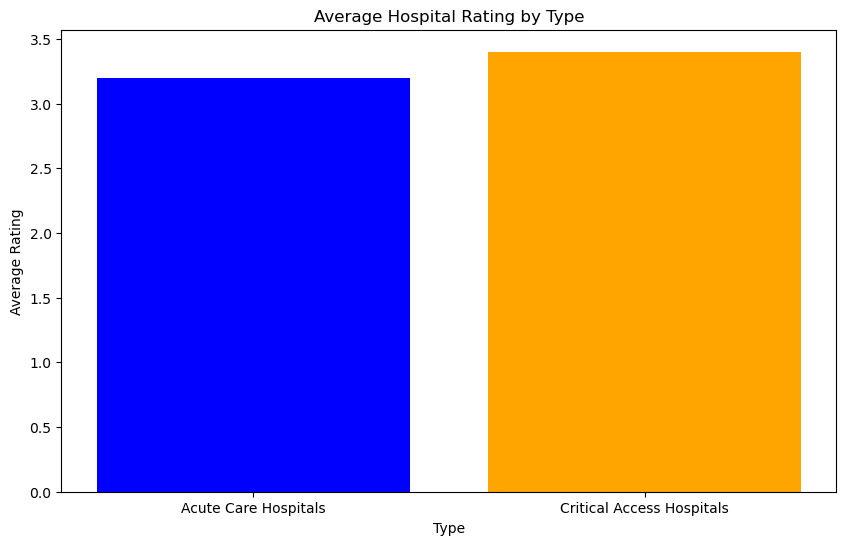

In [109]:
plt.figure(figsize=(10, 6))
plt.bar(hospitaltypeaverage_df['Hospital Type'], hospitaltypeaverage_df['Hospital overall rating'], color = ['blue','orange'])
plt.xlabel('Type')
plt.ylabel('Average Rating')
plt.title('Average Hospital Rating by Type')
plt.savefig("output_data/HospitalTypesRating.png")
plt.show()

In [8]:
hospitalowneraverage = hospitalsoverall.groupby('Hospital Ownership')['Hospital overall rating'].mean().reset_index()
hospitalowneraverage_df = pd.DataFrame(hospitalowneraverage)
hospitalowneraverage_df.head()

Hospital Ownership  Hospital overall rating
0                         Government - Federal                 3.125000
1  Government - Hospital District or Authority                 2.954918
2                           Government - Local                 2.980488
3                           Government - State                 3.054054
4                                    Physician                 3.600000

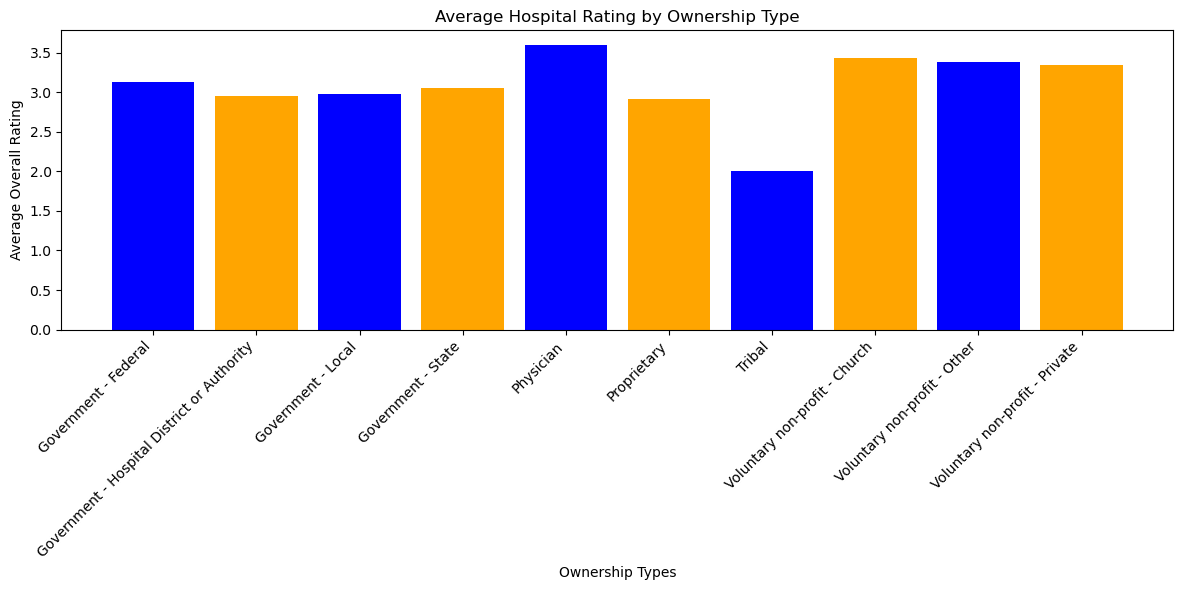

In [160]:
ownership_types = hospitalowneraverage_df['Hospital Ownership']
counts = hospitalowneraverage_df['Hospital overall rating']

plt.figure(figsize=(12, 6))
plt.bar(range(len(ownership_types)), counts, color=['blue', 'orange'])
plt.xlabel('Ownership Types')
plt.ylabel('Average Overall Rating')
plt.title('Average Hospital Rating by Ownership Type')


plt.xticks(range(len(ownership_types)), ownership_types, rotation=45, ha='right')

plt.tight_layout()
plt.savefig("output_data/OwnersAVG.png")
plt.show()

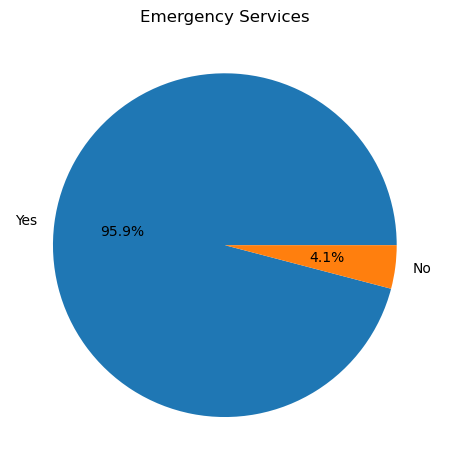

In [111]:
plt.pie(hospitalsoverall["Emergency Services"].value_counts(), labels = ('Yes', 'No'), autopct="%1.1f%%")
plt.title('Emergency Services')
plt.savefig("output_data/EmergencyServices.png")
plt.tight_layout()
plt.show()

In [11]:
eraverage = hospitalsoverall.groupby('Emergency Services')['Hospital overall rating'].mean().reset_index()
eraverage_df = pd.DataFrame(eraverage)
eraverage_df.head()

Emergency Services  Hospital overall rating
0                 No                 3.357143
1                Yes                 3.213707

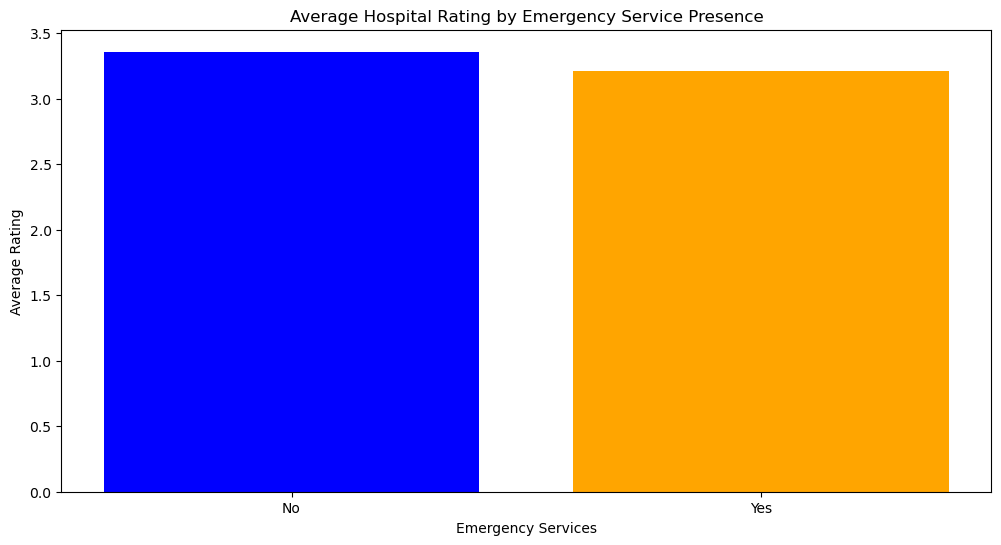

In [112]:
plt.figure(figsize=(12, 6))
plt.bar(eraverage_df['Emergency Services'], eraverage_df['Hospital overall rating'], color = ['blue','orange'])
plt.xlabel('Emergency Services')
plt.ylabel('Average Rating')
plt.title('Average Hospital Rating by Emergency Service Presence')
plt.savefig("output_data/EmergencyServicesRating.png")
plt.show()

In [13]:
hospitals_safety = hospitalsoverall[hospitalsoverall['Count of Safety Measures Better'].str.contains("Not Available")== False]
hospitals_safety['Count of Safety Measures Better'] = pd.to_numeric(hospitals_safety['Count of Safety Measures Better'], errors='coerce')
hospitals_safety.head()

C:\Users\canno\AppData\Local\Temp\ipykernel_20704\202074126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitals_safety['Count of Safety Measures Better'] = pd.to_numeric(hospitals_safety['Count of Safety Measures Better'], errors='coerce')


Facility ID                    Facility Name                     Address  \
0      010001  SOUTHEAST HEALTH MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1      010005         MARSHALL MEDICAL CENTERS  2505 U S HIGHWAY 431 NORTH   
2      010006     NORTH ALABAMA MEDICAL CENTER         1701 VETERANS DRIVE   
3      010007         MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   
5      010011               ST. VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE   

         City State  ZIP Code County Name    Phone Number  \
0      DOTHAN    AL     36301     HOUSTON  (334) 793-8701   
1        BOAZ    AL     35957    MARSHALL  (256) 593-8310   
2    FLORENCE    AL     35630  LAUDERDALE  (256) 629-1000   
3         OPP    AL     36467   COVINGTON  (334) 493-3541   
5  BIRMINGHAM    AL     35235   JEFFERSON  (205) 838-3122   

          Hospital Type                           Hospital Ownership  ...  \
0  Acute Care Hospitals  Government - Hospital District or Authority  ...   
1  Acute Care Hospitals  Government - Hospital District or Authority  ...   
2  Acute Care Hospitals                                  Proprietary  ...   
3  Acute Care Hospitals               Voluntary non-profit - Private  ...   
5  Acute Care Hospitals               Voluntary non-profit - Private  ...   

  Count of READM Measures Better Count of READM Measures No Different  \
0                              0                                   10   
1                              0                                   10   
2                              0                                    8   
3                              0                                    6   
5                              0                                    6   

   Count of READM Measures Worse READM Group Footnote  \
0                              1                  NaN   
1                              0                  NaN   
2                              1                  NaN   
3                              0                  NaN   
5                              3                  NaN   

  Pt Exp Group Measure Count Count of Facility Pt Exp Measures  \
0                          8                                 8   
1                          8                                 8   
2                          8                                 8   
3                          8                                 8   
5                          8                                 8   

  Pt Exp Group Footnote TE Group Measure Count Count of Facility TE Measures  \
0                   NaN                     12                             9   
1                   NaN                     12                            11   
2                   NaN                     12                             9   
3                   NaN                     12                             5   
5                   NaN                     12                             5   

  TE Group Footnote  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
5               NaN  

[5 rows x 38 columns]

In [14]:
hospital_safety_avg= hospitals_safety.groupby('Count of Safety Measures Better')['Hospital overall rating'].mean().reset_index()
hospital_safety_avg.head()

Count of Safety Measures Better  Hospital overall rating
0                                0                 3.232896
1                                1                 3.143007
2                                2                 3.205128
3                                3                 3.337931
4                                4                 3.512195

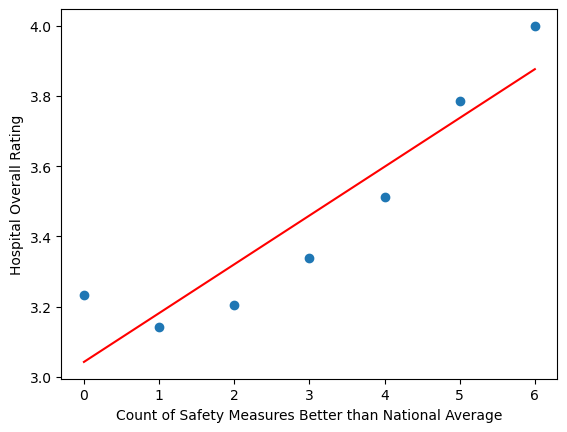

In [15]:
#correlation = stats.pearsonr(hospital_safety_avg['Count of Safety Measures Better'], hospital_safety_avg['Hospital overall rating'])
#print(f"The correlation between saftey measures better than national average and overall rating is {round(correlation[0],2)}")
(slope , intercept, rvalue, pvalue, stderr) = linregress(hospital_safety_avg['Count of Safety Measures Better'], hospital_safety_avg['Hospital overall rating'])
regress_values = hospital_safety_avg['Count of Safety Measures Better'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(hospital_safety_avg['Count of Safety Measures Better'], hospital_safety_avg['Hospital overall rating'])
plt.plot(hospital_safety_avg['Count of Safety Measures Better'], regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Count of Safety Measures Better than National Average')
plt.ylabel('Hospital Overall Rating')
plt.show()

In [153]:
hospitals_mort = hospitalsoverall[hospitalsoverall['Count of MORT Measures Better'].str.contains("Not Available")== False]
hospitals_mort['Count of MORT Measures Better'] = pd.to_numeric(hospitals_mort['Count of MORT Measures Better'], errors='coerce')
hospitals_mort.head()

C:\Users\canno\AppData\Local\Temp\ipykernel_20704\145512918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitals_mort['Count of MORT Measures Better'] = pd.to_numeric(hospitals_mort['Count of MORT Measures Better'], errors='coerce')


Facility ID                    Facility Name                     Address  \
0      010001  SOUTHEAST HEALTH MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1      010005         MARSHALL MEDICAL CENTERS  2505 U S HIGHWAY 431 NORTH   
2      010006     NORTH ALABAMA MEDICAL CENTER         1701 VETERANS DRIVE   
3      010007         MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   
5      010011               ST. VINCENT'S EAST  50 MEDICAL PARK EAST DRIVE   

         City State  ZIP Code County Name    Phone Number  \
0      DOTHAN    AL     36301     HOUSTON  (334) 793-8701   
1        BOAZ    AL     35957    MARSHALL  (256) 593-8310   
2    FLORENCE    AL     35630  LAUDERDALE  (256) 629-1000   
3         OPP    AL     36467   COVINGTON  (334) 493-3541   
5  BIRMINGHAM    AL     35235   JEFFERSON  (205) 838-3122   

          Hospital Type                           Hospital Ownership  ...  \
0  Acute Care Hospitals  Government - Hospital District or Authority  ...   
1  Acute Care Hospitals  Government - Hospital District or Authority  ...   
2  Acute Care Hospitals                                  Proprietary  ...   
3  Acute Care Hospitals               Voluntary non-profit - Private  ...   
5  Acute Care Hospitals               Voluntary non-profit - Private  ...   

  Count of READM Measures Better Count of READM Measures No Different  \
0                              0                                   10   
1                              0                                   10   
2                              0                                    8   
3                              0                                    6   
5                              0                                    6   

   Count of READM Measures Worse READM Group Footnote  \
0                              1                  NaN   
1                              0                  NaN   
2                              1                  NaN   
3                              0                  NaN   
5                              3                  NaN   

  Pt Exp Group Measure Count Count of Facility Pt Exp Measures  \
0                          8                                 8   
1                          8                                 8   
2                          8                                 8   
3                          8                                 8   
5                          8                                 8   

   Pt Exp Group Footnote TE Group Measure Count Count of Facility TE Measures  \
0                    NaN                     12                             9   
1                    NaN                     12                            11   
2                    NaN                     12                             9   
3                    NaN                     12                             5   
5                    NaN                     12                             5   

  TE Group Footnote  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
5               NaN  

[5 rows x 38 columns]

In [17]:
hospital_mort_avg= hospitals_mort.groupby('Count of MORT Measures Better')['Hospital overall rating'].mean().reset_index()
hospital_mort_avg.head()

Count of MORT Measures Better  Hospital overall rating
0                            0.0                 3.221599
1                            1.0                 3.143162
2                            2.0                 3.203608
3                            3.0                 3.340278
4                            4.0                 3.512195

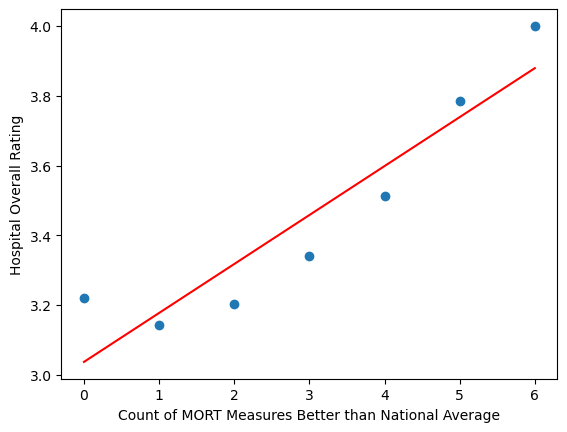

In [18]:
#correlation = stats.pearsonr(hospital_safety_avg['Count of Safety Measures Better'], hospital_safety_avg['Hospital overall rating'])
#print(f"The correlation between saftey measures better than national average and overall rating is {round(correlation[0],2)}")
(slope , intercept, rvalue, pvalue, stderr) = linregress(hospital_mort_avg['Count of MORT Measures Better'], hospital_mort_avg['Hospital overall rating'])
regress_values = hospital_mort_avg['Count of MORT Measures Better'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(hospital_mort_avg['Count of MORT Measures Better'], hospital_mort_avg['Hospital overall rating'])
plt.plot(hospital_mort_avg['Count of MORT Measures Better'], regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Count of MORT Measures Better than National Average')
plt.ylabel('Hospital Overall Rating')
plt.show()

In [158]:
hospitalownermort = hospitalsoverall[hospitalsoverall['Count of MORT Measures Better'] != 'Not Available']
hospitalownermort['Count of MORT Measures Better'] = pd.to_numeric(hospitalownermort['Count of MORT Measures Better'], errors='coerce')
hospitalownermort = hospitalownermort.groupby('Hospital Ownership')['Count of MORT Measures Better'].mean().reset_index()
hospitalownermort

C:\Users\canno\AppData\Local\Temp\ipykernel_20704\1419547898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalownermort['Count of MORT Measures Better'] = pd.to_numeric(hospitalownermort['Count of MORT Measures Better'], errors='coerce')


Hospital Ownership  Count of MORT Measures Better
0                         Government - Federal                       0.250000
1  Government - Hospital District or Authority                       0.045267
2                           Government - Local                       0.014778
3                           Government - State                       0.351351
4                                    Physician                       0.153846
5                                  Proprietary                       0.138577
6                                       Tribal                       0.500000
7                Voluntary non-profit - Church                       0.159836
8                 Voluntary non-profit - Other                       0.166667
9               Voluntary non-profit - Private                       0.180546

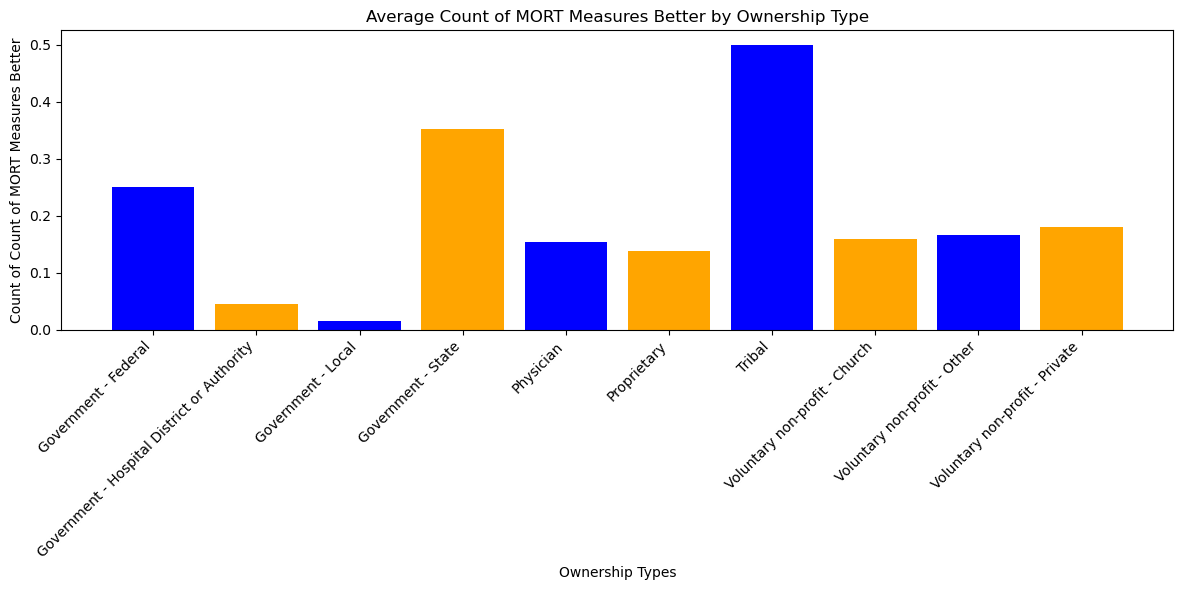

In [159]:
ownership_types = hospitalownermort['Hospital Ownership']
counts = hospitalownermort['Count of MORT Measures Better']

plt.figure(figsize=(12, 6))
plt.bar(range(len(ownership_types)), counts, color=['blue', 'orange'])
plt.xlabel('Ownership Types')
plt.ylabel('Count of Count of MORT Measures Better')
plt.title('Average Count of MORT Measures Better by Ownership Type')


plt.xticks(range(len(ownership_types)), ownership_types, rotation=45, ha='right')

plt.tight_layout()
plt.savefig("output_data/OwnersMORT.png")
plt.show()

In [63]:
hospitaltypemort = pd.DataFrame(hospitals_mort.groupby('Hospital Type')['Count of MORT Measures Better'].mean())
hospitaltypemort

Count of MORT Measures Better
Hospital Type                                           
Acute Care Hospitals                            0.879336
Critical Access Hospitals                       0.004167

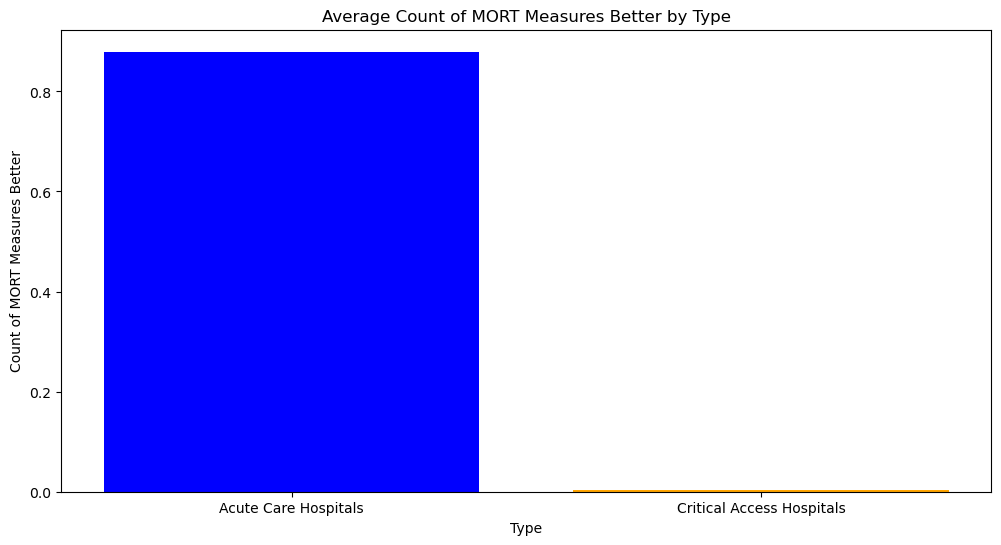

In [116]:
plt.figure(figsize=(12, 6))
plt.bar(hospitaltypemort.index, hospitaltypemort['Count of MORT Measures Better'], color = ['blue','orange'])
plt.xlabel('Type')
plt.ylabel('Count of MORT Measures Better')
plt.title('Average Count of MORT Measures Better by Type')
plt.savefig("output_data/TypeMORT.png")
plt.show()

In [155]:
hospitalsafety = hospitalsoverall[hospitalsoverall['Count of Safety Measures Better'] != 'Not Available']
hospitalsafety['Count of Safety Measures Better'] = pd.to_numeric(hospitalsafety['Count of Safety Measures Better'], errors='coerce')
hospitalsafety = hospitalsafety.groupby('Hospital Ownership')['Count of Safety Measures Better'].mean().reset_index()
hospitalsafety

C:\Users\canno\AppData\Local\Temp\ipykernel_20704\2446188020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalsafety['Count of Safety Measures Better'] = pd.to_numeric(hospitalsafety['Count of Safety Measures Better'], errors='coerce')


Hospital Ownership  \
0                         Government - Federal   
1  Government - Hospital District or Authority   
2                           Government - Local   
3                           Government - State   
4                                    Physician   
5                                  Proprietary   
6                                       Tribal   
7                Voluntary non-profit - Church   
8                 Voluntary non-profit - Other   
9               Voluntary non-profit - Private   

   Count of Safety Measures Better  
0                         0.500000  
1                         0.685590  
2                         0.448087  
3                         1.351351  
4                         0.850000  
5                         0.777778  
6                         0.000000  
7                         0.925620  
8                         0.618321  
9                         0.879945

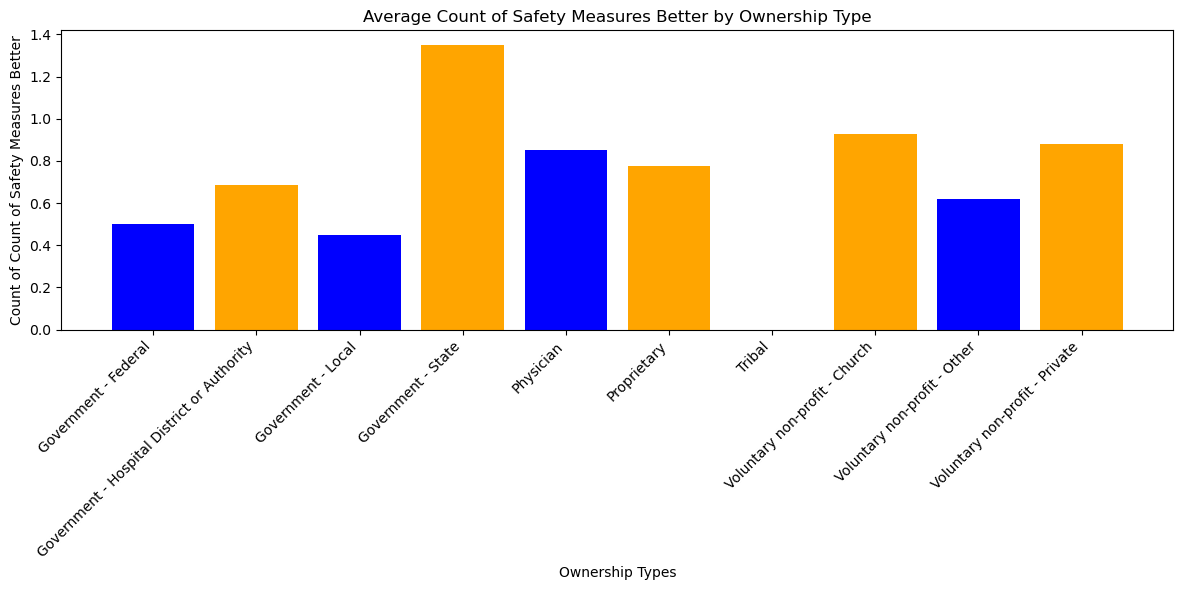

In [157]:
ownership_types = hospitalsafety['Hospital Ownership']
counts = hospitalsafety['Count of Safety Measures Better']

plt.figure(figsize=(12, 6))
plt.bar(range(len(ownership_types)), counts, color=['blue', 'orange'])
plt.xlabel('Ownership Types')
plt.ylabel('Count of Count of Safety Measures Better')
plt.title('Average Count of Safety Measures Better by Ownership Type')


plt.xticks(range(len(ownership_types)), ownership_types, rotation=45, ha='right')

plt.tight_layout()
plt.savefig("output_data/OwnersSafety.png")
plt.show()

In [66]:
hospitaltype_safety = pd.DataFrame(hospitals_safety.groupby('Hospital Type')['Count of Safety Measures Better'].mean())
hospitaltype_safety

Count of Safety Measures Better
Hospital Type                                             
Acute Care Hospitals                              0.874864
Critical Access Hospitals                         0.004167

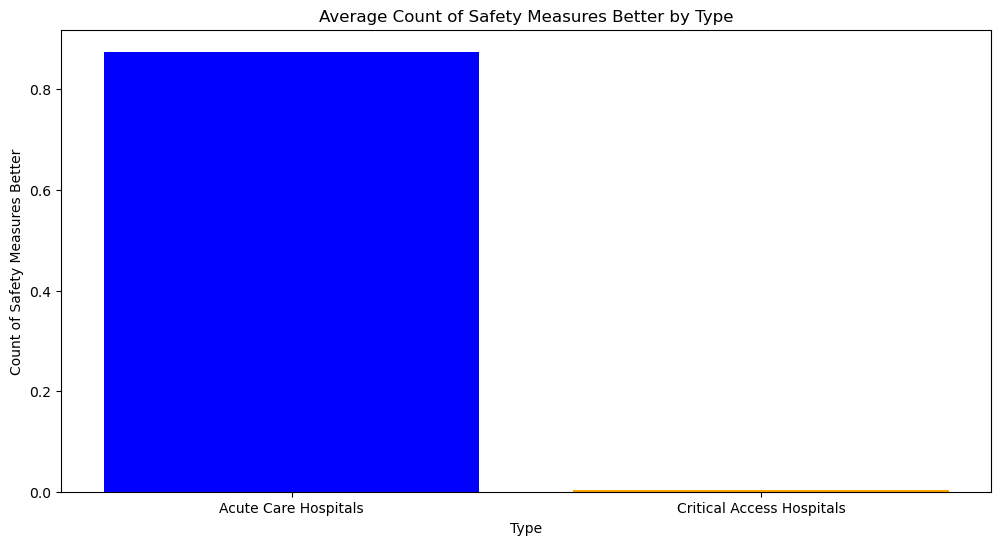

In [118]:
plt.figure(figsize=(12, 6))
plt.bar(hospitaltype_safety.index, hospitaltype_safety['Count of Safety Measures Better'], color = ['blue','orange'])
plt.xlabel('Type')
plt.ylabel('Count of Safety Measures Better')
plt.title('Average Count of Safety Measures Better by Type')
plt.savefig("output_data/TypeSafety.png")
plt.show()

In [76]:
hospitalownerreadm = hospitalsoverall[hospitalsoverall['Count of READM Measures Better'] != 'Not Available']
hospitalownerreadm['Count of READM Measures Better'] = pd.to_numeric(hospitalownerreadm['Count of READM Measures Better'], errors='coerce')
hospitalownerreadm = hospitalownerreadm.groupby('Hospital Ownership')['Count of READM Measures Better'].mean().reset_index()
hospitalownerreadm

Hospital Ownership  Count of READM Measures Better
0                         Government - Federal                        0.125000
1  Government - Hospital District or Authority                        0.331967
2                           Government - Local                        0.390244
3                           Government - State                        0.378378
4                                    Physician                        0.450000
5                                  Proprietary                        0.238532
6                                       Tribal                        0.000000
7                Voluntary non-profit - Church                        0.420408
8                 Voluntary non-profit - Other                        0.389513
9               Voluntary non-profit - Private                        0.442244

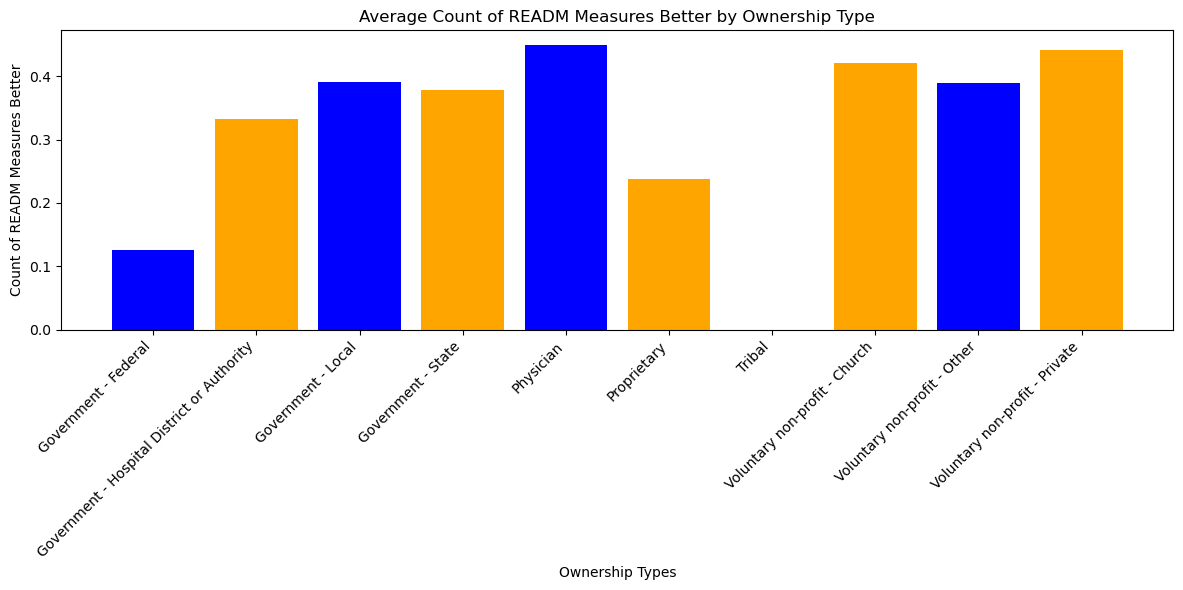

In [143]:
ownership_types = hospitalownerreadm['Hospital Ownership']
counts = hospitalownerreadm['Count of READM Measures Better']

plt.figure(figsize=(12, 6))
plt.bar(range(len(ownership_types)), counts, color=['blue', 'orange'])
plt.xlabel('Ownership Types')
plt.ylabel('Count of READM Measures Better')
plt.title('Average Count of READM Measures Better by Ownership Type')


plt.xticks(range(len(ownership_types)), ownership_types, rotation=45, ha='right')

plt.tight_layout()
plt.savefig("output_data/OwnersREADM.png")
plt.show()

In [78]:
hospitaltypereadm = hospitalsoverall[hospitalsoverall['Count of READM Measures Better'] != 'Not Available']
hospitaltypereadm['Count of READM Measures Better'] = pd.to_numeric(hospitaltypereadm['Count of READM Measures Better'], errors='coerce')
hospitaltypereadm = hospitaltypereadm.groupby('Hospital Type')['Count of READM Measures Better'].mean().reset_index()
hospitaltypereadm

Hospital Type  Count of READM Measures Better
0       Acute Care Hospitals                        0.380866
1  Critical Access Hospitals                        0.427729

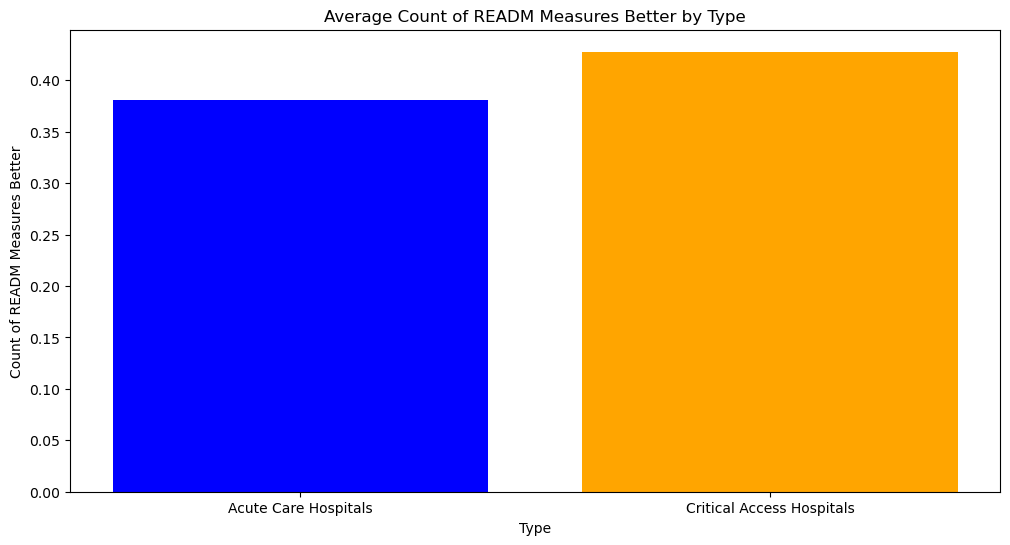

In [131]:
plt.figure(figsize=(12, 6))
plt.bar(hospitaltypereadm['Hospital Type'], hospitaltypereadm['Count of READM Measures Better'], color = ['blue','orange'])
plt.xlabel('Type')
plt.ylabel('Count of READM Measures Better')
plt.title('Average Count of READM Measures Better by Type')
plt.savefig("output_data/TypeREADM.png")
plt.show()

In [82]:
medicarespending = Path("Resources/Medicare_Hospital_Spending_Per_Patient-State.csv")

medicare = pd.read_csv(medicarespending)
medicare.head()

State Measure ID                                       Measure Name  \
0    AK     MSPB-1  Medicare hospital spending per patient (Medica...   
1    AL     MSPB-1  Medicare hospital spending per patient (Medica...   
2    AR     MSPB-1  Medicare hospital spending per patient (Medica...   
3    AS     MSPB-1  Medicare hospital spending per patient (Medica...   
4    AZ     MSPB-1  Medicare hospital spending per patient (Medica...   

           Score  Footnote  Start Date    End Date  
0           0.92      14.0  01/01/2021  12/31/2021  
1           0.96       NaN  01/01/2021  12/31/2021  
2           1.00       NaN  01/01/2021  12/31/2021  
3  Not Available       9.0  01/01/2021  12/31/2021  
4           0.94       NaN  01/01/2021  12/31/2021

In [139]:
medicare.dropna(subset = 'Score')
medicare = medicare[medicare['Score'] != 'Not Available']
medicare['Score'] = pd.to_numeric(medicare['Score'], errors='coerce')
medicare.head()

State Measure ID                                       Measure Name  Score  \
0    AK     MSPB-1  Medicare hospital spending per patient (Medica...   0.92   
1    AL     MSPB-1  Medicare hospital spending per patient (Medica...   0.96   
2    AR     MSPB-1  Medicare hospital spending per patient (Medica...   1.00   
4    AZ     MSPB-1  Medicare hospital spending per patient (Medica...   0.94   
5    CA     MSPB-1  Medicare hospital spending per patient (Medica...   1.00   

   Footnote  Start Date    End Date  
0      14.0  01/01/2021  12/31/2021  
1       NaN  01/01/2021  12/31/2021  
2       NaN  01/01/2021  12/31/2021  
4       NaN  01/01/2021  12/31/2021  
5       NaN  01/01/2021  12/31/2021

In [90]:
hospitalspendingbystate = medicare.groupby('State')['Score'].mean().reset_index()
hospitalspendingbystate.head()

State  Score
0    AK   0.92
1    AL   0.96
2    AR   1.00
3    AZ   0.94
4    CA   1.00

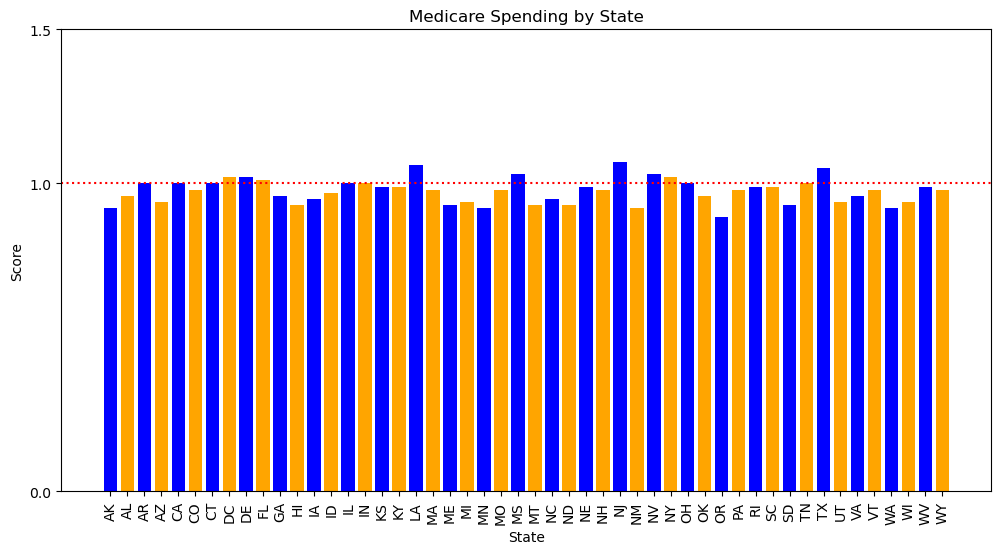

In [132]:
plt.figure(figsize=(12, 6))
plt.bar(hospitalspendingbystate['State'], hospitalspendingbystate['Score'], color = ['blue','orange'])
plt.xlabel('State')
plt.ylabel('Score')
plt.title('Medicare Spending by State')
plt.xticks(rotation=90)
plt.ylim(0, 1.5)
plt.yticks([0, 1, 1.5])
plt.axhline(y=1, color='red', linestyle='dotted')
plt.savefig("output_data/StateMedicare.png")
plt.show()

In [97]:
overallmedicare = pd.merge(hospitalstateaverage, hospitalspendingbystate, on = 'State')
overallmedicare.head()

State  Hospital overall rating  Score
0    AK                 2.857143   0.92
1    AL                 3.015385   0.96
2    AR                 2.916667   1.00
3    AZ                 3.000000   0.94
4    CA                 3.007663   1.00

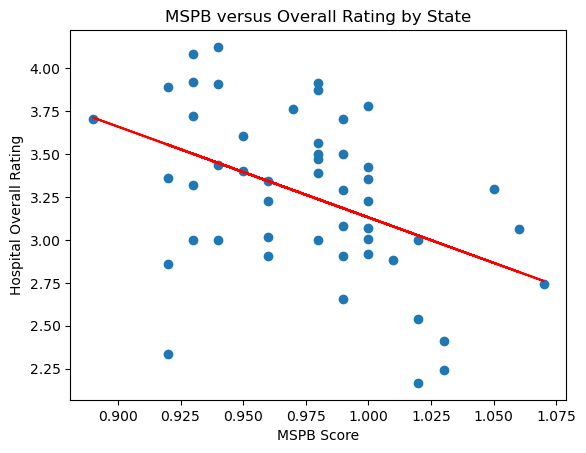

In [133]:
(slope , intercept, rvalue, pvalue, stderr) = linregress(overallmedicare['Score'], overallmedicare['Hospital overall rating'])
regress_values = overallmedicare['Score'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(overallmedicare['Score'], overallmedicare['Hospital overall rating'])
plt.plot(overallmedicare['Score'], regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('MSPB Score')
plt.ylabel('Hospital Overall Rating')
plt.title('MSPB versus Overall Rating by State')
plt.savefig("output_data/MSPBState.png")
plt.show()

In [100]:
medicarespending2 = Path("Resources/Medicare_Hospital_Spending_Per_Patient-Hospital.csv")

medicare2 = pd.read_csv(medicarespending)
medicare2.head()

State Measure ID                                       Measure Name  \
0    AK     MSPB-1  Medicare hospital spending per patient (Medica...   
1    AL     MSPB-1  Medicare hospital spending per patient (Medica...   
2    AR     MSPB-1  Medicare hospital spending per patient (Medica...   
3    AS     MSPB-1  Medicare hospital spending per patient (Medica...   
4    AZ     MSPB-1  Medicare hospital spending per patient (Medica...   

           Score  Footnote  Start Date    End Date  
0           0.92      14.0  01/01/2021  12/31/2021  
1           0.96       NaN  01/01/2021  12/31/2021  
2           1.00       NaN  01/01/2021  12/31/2021  
3  Not Available       9.0  01/01/2021  12/31/2021  
4           0.94       NaN  01/01/2021  12/31/2021

In [102]:
medicare2.dropna(subset = 'Score')
medicare2 = medicare2[medicare2['Score'] != 'Not Available']
medicare2['Score'] = pd.to_numeric(medicare2['Score'], errors='coerce')
medicare2.head()

State Measure ID                                       Measure Name  Score  \
0    AK     MSPB-1  Medicare hospital spending per patient (Medica...   0.92   
1    AL     MSPB-1  Medicare hospital spending per patient (Medica...   0.96   
2    AR     MSPB-1  Medicare hospital spending per patient (Medica...   1.00   
4    AZ     MSPB-1  Medicare hospital spending per patient (Medica...   0.94   
5    CA     MSPB-1  Medicare hospital spending per patient (Medica...   1.00   

   Footnote  Start Date    End Date  
0      14.0  01/01/2021  12/31/2021  
1       NaN  01/01/2021  12/31/2021  
2       NaN  01/01/2021  12/31/2021  
4       NaN  01/01/2021  12/31/2021  
5       NaN  01/01/2021  12/31/2021

In [103]:
hospitalspendingbystate2 = medicare2.groupby('State')['Score'].mean().reset_index()
hospitalspendingbystate2.head()

State  Score
0    AK   0.92
1    AL   0.96
2    AR   1.00
3    AZ   0.94
4    CA   1.00

In [104]:
overallmedicare2 = pd.merge(hospitalstateaverage, hospitalspendingbystate2, on = 'State')
overallmedicare2.head()

State  Hospital overall rating  Score
0    AK                 2.857143   0.92
1    AL                 3.015385   0.96
2    AR                 2.916667   1.00
3    AZ                 3.000000   0.94
4    CA                 3.007663   1.00

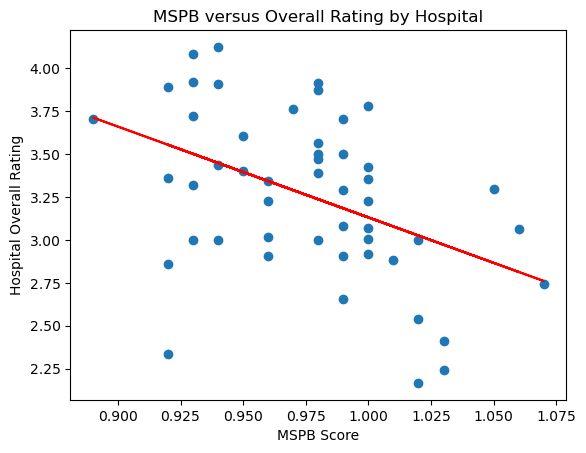

In [134]:
(slope , intercept, rvalue, pvalue, stderr) = linregress(overallmedicare2['Score'], overallmedicare2['Hospital overall rating'])
regress_values = overallmedicare2['Score'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(overallmedicare2['Score'], overallmedicare2['Hospital overall rating'])
plt.plot(overallmedicare2['Score'], regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('MSPB Score')
plt.ylabel('Hospital Overall Rating')
plt.title('MSPB versus Overall Rating by Hospital')
plt.savefig("output_data/MSPBHospital.png")
plt.show()